In [1]:
# Dependencies
import numpy as np

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [3]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [4]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [90]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract
import datetime as dt
# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
# info on how to develop query for specific month -- https://stackoverflow.com/questions/11616260/how-to-get-all-objects-with-a-date-that-fall-in-a-specific-month-sqlalchemy/31641488
june_results = []
june_results = session.query(Measurement.date, Measurement.tobs).\
            filter(extract('month', Measurement.date)==6).all()

In [91]:
#  3. Convert the June temperatures to a list.
print(june_results)

[('2010-06-01', 78.0), ('2010-06-02', 76.0), ('2010-06-03', 78.0), ('2010-06-04', 76.0), ('2010-06-05', 77.0), ('2010-06-06', 78.0), ('2010-06-07', 77.0), ('2010-06-08', 78.0), ('2010-06-09', 78.0), ('2010-06-10', 79.0), ('2010-06-11', 78.0), ('2010-06-12', 78.0), ('2010-06-13', 78.0), ('2010-06-14', 77.0), ('2010-06-15', 78.0), ('2010-06-16', 78.0), ('2010-06-17', 77.0), ('2010-06-18', 77.0), ('2010-06-19', 82.0), ('2010-06-20', 78.0), ('2010-06-21', 78.0), ('2010-06-22', 78.0), ('2010-06-23', 78.0), ('2010-06-24', 78.0), ('2010-06-25', 77.0), ('2010-06-26', 76.0), ('2010-06-27', 78.0), ('2010-06-28', 78.0), ('2010-06-29', 78.0), ('2010-06-30', 78.0), ('2011-06-01', 77.0), ('2011-06-02', 78.0), ('2011-06-03', 73.0), ('2011-06-04', 70.0), ('2011-06-05', 76.0), ('2011-06-06', 77.0), ('2011-06-07', 77.0), ('2011-06-08', 77.0), ('2011-06-09', 77.0), ('2011-06-10', 78.0), ('2011-06-11', 77.0), ('2011-06-12', 77.0), ('2011-06-13', 78.0), ('2011-06-14', 78.0), ('2011-06-15', 77.0), ('2011-06

In [92]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
import pandas as pd

june_temp_df = pd.DataFrame(june_results, columns=['date', 'temperature'])
june_temp_df.set_index(june_temp_df['date'], inplace=False)
print(june_temp_df)

            date  temperature
0     2010-06-01         78.0
1     2010-06-02         76.0
2     2010-06-03         78.0
3     2010-06-04         76.0
4     2010-06-05         77.0
...          ...          ...
1695  2017-06-26         79.0
1696  2017-06-27         74.0
1697  2017-06-28         74.0
1698  2017-06-29         76.0
1699  2017-06-30         75.0

[1700 rows x 2 columns]


In [93]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_temp_df.describe()

,temperature
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [105]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
dec_results = []
dec_results = session.query(Measurement.date, Measurement.tobs).\
            filter(extract('month', Measurement.date)==12).all()

In [103]:
# 7. Convert the December temperatures to a list.
print(dec_results)

[('2010-12-01', 76.0), ('2010-12-03', 74.0), ('2010-12-04', 74.0), ('2010-12-06', 64.0), ('2010-12-07', 64.0), ('2010-12-08', 67.0), ('2010-12-09', 77.0), ('2010-12-10', 66.0), ('2010-12-11', 69.0), ('2010-12-12', 68.0), ('2010-12-13', 68.0), ('2010-12-14', 71.0), ('2010-12-15', 74.0), ('2010-12-16', 67.0), ('2010-12-17', 66.0), ('2010-12-18', 69.0), ('2010-12-19', 71.0), ('2010-12-23', 70.0), ('2010-12-24', 70.0), ('2010-12-26', 74.0), ('2010-12-27', 74.0), ('2010-12-28', 71.0), ('2010-12-29', 75.0), ('2010-12-30', 75.0), ('2010-12-31', 72.0), ('2011-12-01', 69.0), ('2011-12-02', 68.0), ('2011-12-03', 73.0), ('2011-12-04', 74.0), ('2011-12-05', 73.0), ('2011-12-06', 73.0), ('2011-12-07', 73.0), ('2011-12-08', 73.0), ('2011-12-09', 71.0), ('2011-12-10', 73.0), ('2011-12-11', 73.0), ('2011-12-12', 77.0), ('2011-12-13', 72.0), ('2011-12-14', 71.0), ('2011-12-15', 73.0), ('2011-12-16', 70.0), ('2011-12-17', 73.0), ('2011-12-18', 69.0), ('2011-12-19', 74.0), ('2011-12-20', 72.0), ('2011-12

In [96]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_temp_df = pd.DataFrame(dec_results, columns=['date', 'temperature'])
dec_temp_df.set_index(dec_temp_df['date'], inplace=False)
print(dec_temp_df)

            date  temperature
0     2010-12-01         76.0
1     2010-12-03         74.0
2     2010-12-04         74.0
3     2010-12-06         64.0
4     2010-12-07         64.0
...          ...          ...
1512  2016-12-27         71.0
1513  2016-12-28         71.0
1514  2016-12-29         69.0
1515  2016-12-30         65.0
1516  2016-12-31         65.0

[1517 rows x 2 columns]


In [97]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_temp_df.describe()

,temperature
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


Text(0, 0.5, 'Temperature (°F)')

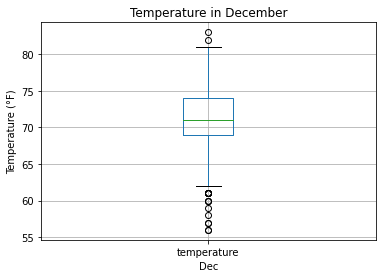

In [114]:
import matplotlib.pyplot as plt
dec_temp_df.boxplot()
plt.title('Temperature in December')
plt.xlabel('Dec')
plt.ylabel('Temperature (°F)')

Text(0, 0.5, 'Temperature (°F)')

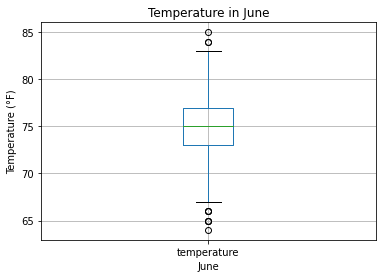

In [113]:
june_temp_df.boxplot()
plt.title('Temperature in June')
plt.xlabel('June')
plt.ylabel('Temperature (°F)')

In [115]:
june_precip_results = session.query(Measurement.date,Measurement.prcp).\
                  filter(extract('month', Measurement.date)==6).all()
print(june_precip_results)

[('2010-06-01', 0.0), ('2010-06-02', 0.01), ('2010-06-03', 0.0), ('2010-06-04', 0.0), ('2010-06-05', 0.0), ('2010-06-06', 0.0), ('2010-06-07', 0.0), ('2010-06-08', 0.0), ('2010-06-09', 0.0), ('2010-06-10', 0.0), ('2010-06-11', 0.0), ('2010-06-12', 0.0), ('2010-06-13', 0.0), ('2010-06-14', 0.0), ('2010-06-15', 0.0), ('2010-06-16', 0.0), ('2010-06-17', 0.0), ('2010-06-18', 0.0), ('2010-06-19', 0.0), ('2010-06-20', 0.0), ('2010-06-21', 0.0), ('2010-06-22', 0.0), ('2010-06-23', 0.0), ('2010-06-24', 0.0), ('2010-06-25', 0.0), ('2010-06-26', 0.02), ('2010-06-27', 0.0), ('2010-06-28', 0.0), ('2010-06-29', 0.0), ('2010-06-30', 0.0), ('2011-06-01', 0.07), ('2011-06-02', 0.0), ('2011-06-03', 0.56), ('2011-06-04', 0.89), ('2011-06-05', 0.0), ('2011-06-06', 0.0), ('2011-06-07', 0.0), ('2011-06-08', 0.03), ('2011-06-09', 0.01), ('2011-06-10', 0.0), ('2011-06-11', 0.0), ('2011-06-12', 0.0), ('2011-06-13', 0.0), ('2011-06-14', 0.0), ('2011-06-15', 0.0), ('2011-06-17', 0.0), ('2011-06-18', 0.0), ('201

In [118]:
june_precip_df = pd.DataFrame(june_precip_results, columns=['date', 'precipitation'])
june_precip_df.set_index(df['date'], inplace=True)

print(june_precip_df)

                  date  precipitation
date                                 
2010-06-01  2010-06-01           0.00
2010-06-02  2010-06-02           0.01
2010-06-03  2010-06-03           0.00
2010-06-04  2010-06-04           0.00
2010-06-05  2010-06-05           0.00
...                ...            ...
2017-06-26  2017-06-26           0.02
2017-06-27  2017-06-27           0.10
2017-06-28  2017-06-28           0.02
2017-06-29  2017-06-29           0.04
2017-06-30  2017-06-30           0.20

[1700 rows x 2 columns]


In [119]:
dec_precip_results = session.query(Measurement.date,Measurement.prcp).\
                  filter(extract('month', Measurement.date)==12).all()
print(dec_precip_results)

[('2010-12-01', 0.04), ('2010-12-03', 0.0), ('2010-12-04', 0.0), ('2010-12-06', 0.0), ('2010-12-07', 0.0), ('2010-12-08', 0.0), ('2010-12-09', 0.0), ('2010-12-10', 1.58), ('2010-12-11', 0.77), ('2010-12-12', 0.0), ('2010-12-13', 0.0), ('2010-12-14', 0.0), ('2010-12-15', 0.0), ('2010-12-16', 0.0), ('2010-12-17', 0.0), ('2010-12-18', 0.0), ('2010-12-19', 1.4), ('2010-12-23', 0.0), ('2010-12-24', 0.0), ('2010-12-26', None), ('2010-12-27', 0.13), ('2010-12-28', 0.55), ('2010-12-29', 0.06), ('2010-12-30', 0.01), ('2010-12-31', 0.0), ('2011-12-01', 0.03), ('2011-12-02', 0.08), ('2011-12-03', 0.0), ('2011-12-04', 0.0), ('2011-12-05', 0.0), ('2011-12-06', 0.0), ('2011-12-07', 0.0), ('2011-12-08', 0.0), ('2011-12-09', 0.13), ('2011-12-10', 0.07), ('2011-12-11', 0.07), ('2011-12-12', 0.08), ('2011-12-13', 0.4), ('2011-12-14', 0.7), ('2011-12-15', 0.0), ('2011-12-16', 0.01), ('2011-12-17', 0.07), ('2011-12-18', 0.02), ('2011-12-19', 0.15), ('2011-12-20', 0.02), ('2011-12-21', 0.18), ('2011-12-22'

In [124]:
dec_precip_df = pd.DataFrame(dec_precip_results, columns=['date', 'precipitation'])
dec_precip_df



,date,precipitation
0,2010-12-01,0.04
1,2010-12-03,0.00
2,2010-12-04,0.00
3,2010-12-06,0.00
4,2010-12-07,0.00
...,...,...
1512,2016-12-27,0.14
1513,2016-12-28,0.14
1514,2016-12-29,1.03
1515,2016-12-30,2.37
